# Dataset Features

This notebook summarizes the main features observed in the data.

Most of these features are relevant to statistical modelling.

## (Preliminaries)

The code below...

- ... imports the packages we'll need
- ... specifies all dependent variable names (`dvnames`)
- ... defines a data loading function (`load_data`)

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import detrend1d as dtr

dvnames = ['RAnkAng_X', 'RKneeAng_X', 'RHipAng_X',
           'LAnkAng_X', 'LKneeAng_X', 'LHipAng_X',
           'RHipAng_Y', 'RHipAng_Z', 'LHipAng_Y', 'LHipAng_Z',
           'RAnkAng_Y', 'RKneeAng_Y', 'LAnkAng_Y', 'LKneeAng_Y']


def load_data( subj=1, dvname=None ):
    fnameNPZ   = os.path.join(dtr.dirDATA, f's{subj:03}.npz')
    with np.load(fnameNPZ) as z:
        cond   = z['cond']
        tsteps = z['tsteps']
        sess   = z['sess']
        tsess  = z['tsess']
        dv     = None if (dvname is None) else z[dvname]
    return cond, tsteps, sess, tsess, dv


## Variable step durations

Step (stride?) durations are generally variable step-to-step as shown below.

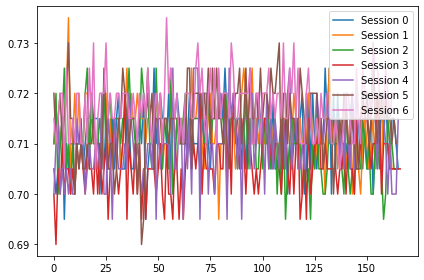

In [2]:
cond,tsteps,sess,tsess,dv = load_data( subj=1, dvname=None )

plt.figure()
ax = plt.axes()
for s in np.unique(sess):
    t  = tsteps[ sess==s ]
    dt = np.diff(t)
    ax.plot( dt, label=f'Session {s}' )
ax.legend( loc='upper right' )
plt.tight_layout()
plt.show()
    


## Variable number of steps

Due to variable step (stride?) durations, the total number of steps during each session is also non-constant:

In [3]:
nsteps  = [ (sess==s).sum()   for s in np.unique(sess)]

print( nsteps )

[167, 167, 167, 168, 167, 166, 165]


## Variable total session duration

The total session duration (from the start of one session to the start of the next session) is generally non-constant:

In [4]:
tmin  = tsess / 60
dtmin = np.diff( tmin )

print( 'Session start times (min):' )
print( np.round(tmin, 1) )
print()
print( 'Start-to-start durations (min)' )
print( np.round( dtmin, 1) )


Session start times (min):
[ 0.   8.1 17.4 26.  36.9 46.  57.2]

Start-to-start durations (min)
[ 8.1  9.3  8.6 10.9  9.1 11.2]


## Linear trends within sessions

Approximately linear trends can be seen for certain dependent variables (DVs) within a single session:

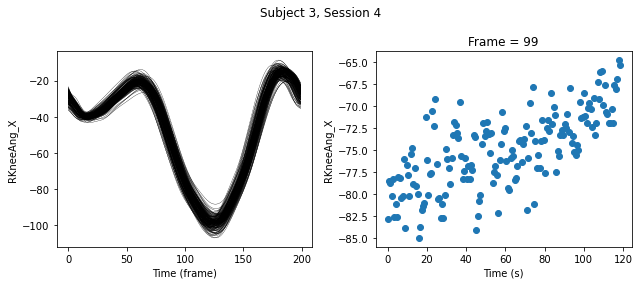

In [5]:
subj   = 3             # subject number
dvname = 'RKneeAng_X'  # dependent variable name
s      = 4             # session number
frame  = 99            # time frame number


# load data:
cond,tsteps,sess,tsess,dv = load_data( subj=subj, dvname=dvname )


# plot:
plt.close('all')
fig,axs = plt.subplots( 1, 2, figsize=(9,4) )
ax0,ax1 = axs

i     = sess==s
tt    = tsteps[i]
yy    = dv[i]
ax0.plot(  yy.T, color='k', lw=0.3  )
ax0.set_xlabel('Time (frame)')
ax0.set_ylabel( dvname )

ax1.plot( tt , yy[:,frame], 'o' )
ax1.set_xlabel( 'Time (s)' )
ax1.set_ylabel( dvname )
ax1.set_title( f'Frame = {frame}' )

plt.suptitle( f'Subject {subj}, Session {s}')
plt.tight_layout()
plt.show()



## Linear trends across sessions

Approximately linear trends can also be observed across all sessions for some DVs:

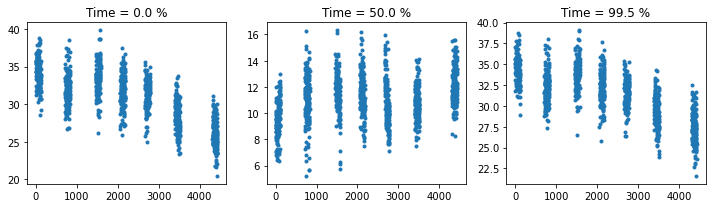

In [6]:
subj   = 3             # subject number
dvname = 'RHipAng_X'   # dependent variable name
s      = 4             # session number
frames = [0, 100, 199] # time frame number


# load data:
cond,tsteps,sess,tsess,dv = load_data( subj=subj, dvname=dvname )


# construct time vector:
ts = np.hstack(  [[t]*(sess==i).sum()   for i,t in enumerate(tsess)]  )
t  = ts + tsteps


# scatterplots:  
fig,axs = plt.subplots( 1, 3, figsize=(10,3) )
for ax,frame in zip(axs, frames):
    yy = dv[:,frame]
    ax.plot(t, yy, 'o', ms=3)
    ax.set_title( f'Time = {frame/2} %')
plt.tight_layout()
plt.show()